In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
data = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


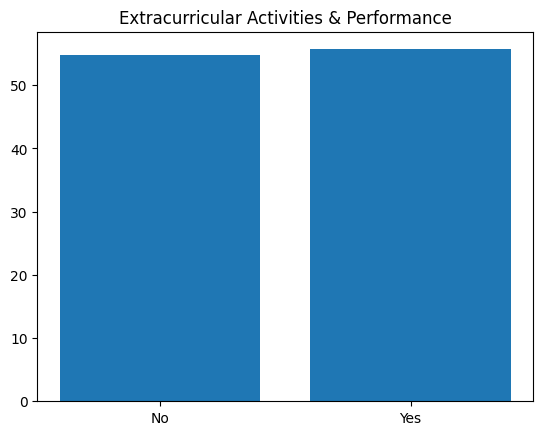

In [19]:
dfgr = data.groupby(by="Extracurricular Activities").mean(numeric_only=True)
plt.bar(dfgr.index,dfgr['Performance Index'])
plt.title("Extracurricular Activities & Performance")
plt.show()

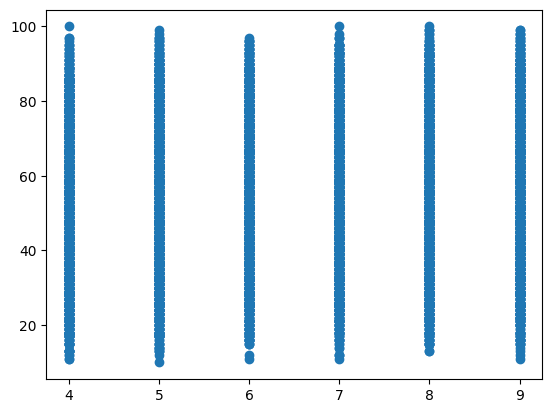

In [20]:
plt.scatter(data['Sleep Hours'],data['Performance Index'])
plt.show()

In [21]:
study_rate= data['Hours Studied']/(24-data['Sleep Hours'])*100

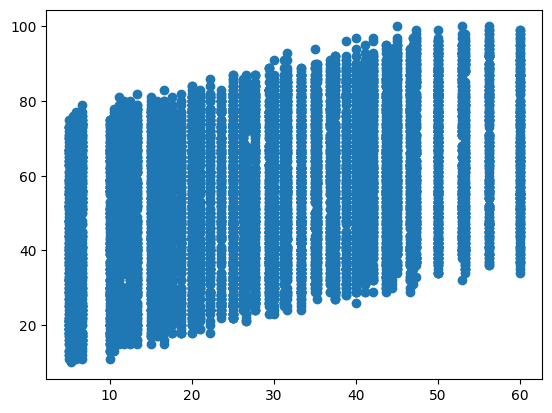

In [22]:
plt.scatter(study_rate,data['Performance Index'])
plt.show()

In [23]:
le = LabelEncoder()

In [26]:
data['Extracurricular Activities'] = le.fit_transform(data['Extracurricular Activities'])

In [27]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [28]:
y = data['Performance Index']
x = data.drop('Performance Index',axis=1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.8)

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.score(x_test,y_test)

0.9889832909573145